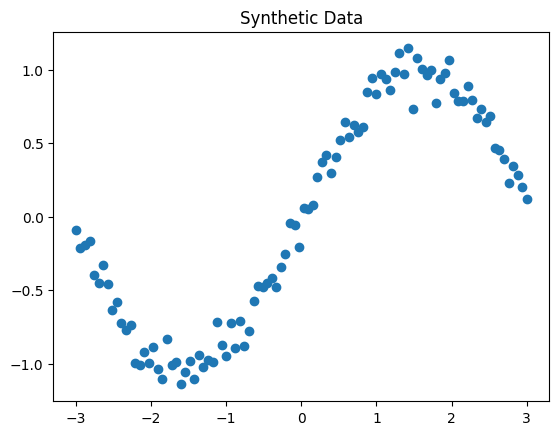

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.1, X.shape)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X, y)
plt.title("Synthetic Data")
plt.show()


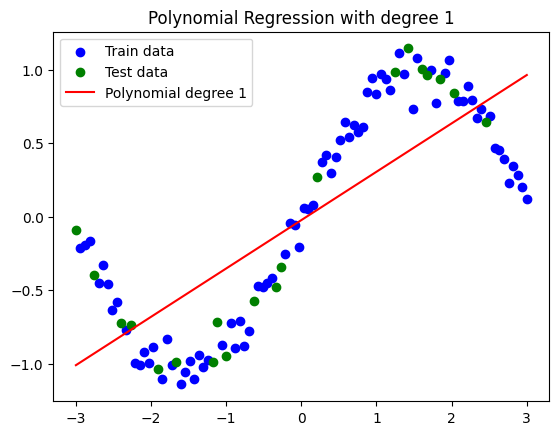

Degree: 1
Train Error: 0.1942
Test Error: 0.2029



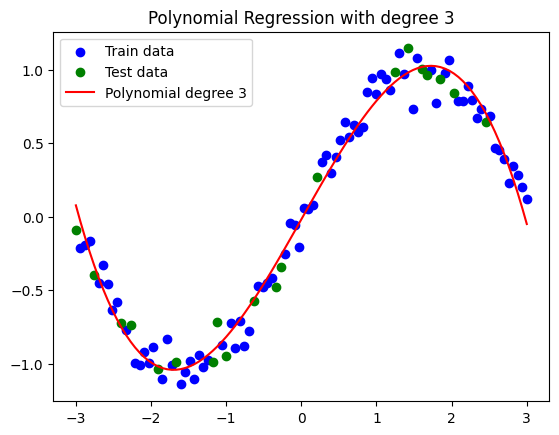

Degree: 3
Train Error: 0.0110
Test Error: 0.0101



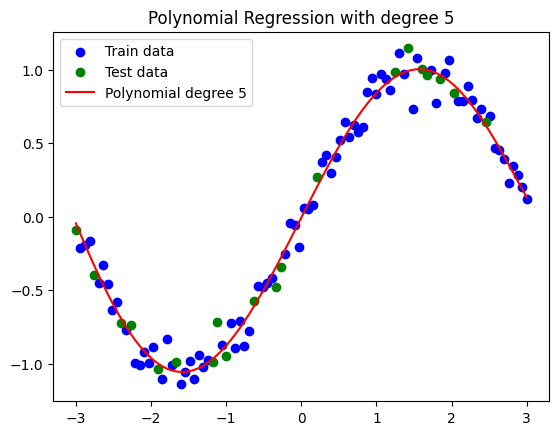

Degree: 5
Train Error: 0.0080
Test Error: 0.0065



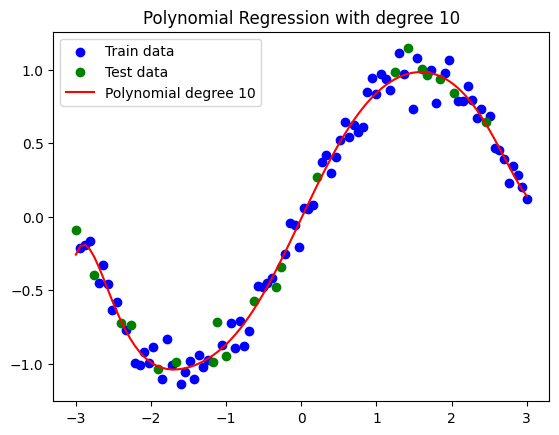

Degree: 10
Train Error: 0.0075
Test Error: 0.0082



In [3]:
# Define a function to plot polynomial regression
def plot_polynomial_regression(degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)

    # Plot results
    plt.scatter(X_train, y_train, color='blue', label='Train data')
    plt.scatter(X_test, y_test, color='green', label='Test data')
    plt.plot(X, model.predict(polynomial_features.transform(X)), color='red', label=f'Polynomial degree {degree}')
    plt.title(f'Polynomial Regression with degree {degree}')
    plt.legend()
    plt.show()

    # Print error
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    print(f'Degree: {degree}\nTrain Error: {train_error:.4f}\nTest Error: {test_error:.4f}\n')

# Plot and evaluate for different degrees
for degree in [1, 3, 5, 10]:
    plot_polynomial_regression(degree)


In [4]:
from sklearn.model_selection import cross_val_score

# Using 5-fold cross-validation
degree = 5
polynomial_features = PolynomialFeatures(degree=degree)
X_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
cv_scores = cross_val_score(model, X_poly, y, cv=5, scoring="neg_mean_squared_error")

print(f"Cross-validation scores for degree {degree}: {cv_scores}")
print(f"Variance of cross-validation scores: {np.var(cv_scores):.4f}")

Cross-validation scores for degree 5: [-0.19199755 -0.01122681 -0.00640605 -0.01220297 -1.09172329]
Variance of cross-validation scores: 0.1768


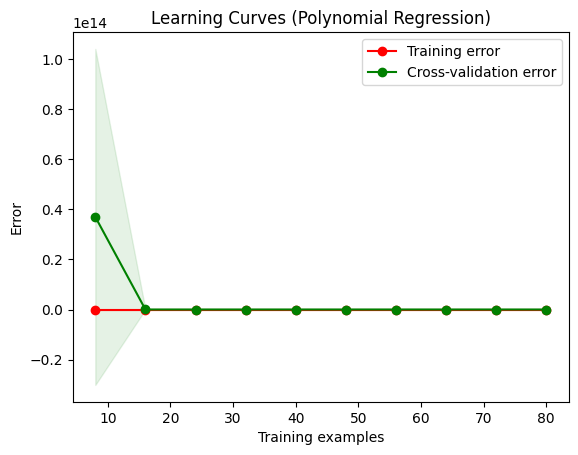

In [5]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(), X_poly, y, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10))

train_errors_mean = -np.mean(train_scores, axis=1)
test_errors_mean = -np.mean(test_scores, axis=1)
train_errors_std = np.std(train_scores, axis=1)
test_errors_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves (Polynomial Regression)")
plt.xlabel("Training examples")
plt.ylabel("Error")
plt.plot(train_sizes, train_errors_mean, 'o-', color="r", label="Training error")
plt.plot(train_sizes, test_errors_mean, 'o-', color="g", label="Cross-validation error")
plt.fill_between(train_sizes, train_errors_mean - train_errors_std, train_errors_mean + train_errors_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_errors_mean - test_errors_std, test_errors_mean + test_errors_std, alpha=0.1, color="g")
plt.legend(loc="best")
plt.show()
